In [2]:
import pandas as pd
import os

In [3]:
df2 = pd.read_csv("/Users/lisafranchetti/table2_11-16.csv")

In [4]:
df2.rename(columns={'col1': 'age_11-16_years'}, inplace=True)
df2.rename(columns={'col7': '2017_%'}, inplace=True)
df2.rename(columns={'col8': '2020_%'}, inplace=True)
df2.rename(columns={'col9': '2021_%'}, inplace=True)
df2.rename(columns={'col10': '2022_%'}, inplace=True)
df2.rename(columns={'col11': '2023_%'}, inplace=True)

In [5]:
# Drop first 5 rows and last rows are they are not required/empty
df2 = df2.drop(index=[0, 1, 2, 3, 4, 26, 27, 28])


In [6]:
df2.head(27)

,age_11-16_years,2017_%,2020_%,2021_%,2022_%,2023_%
5,,,,,NaN,
6,All,,,,NaN,
7,Unlikely to have a disorder,72.3707735601716,71.588136909784,69.4607608261955,68.7550640656,65.4268345970171
8,Possible disorder,14.3786449257167,10.7814614541705,12.866592520614,10.8856453881101,11.9546881832142
9,Probable disorder,13.2505815141117,17.6304016360455,17.6726466531904,20.3592905462899,22.6184772197687
10,,,,,NaN,NaN
11,Boys/young men,,,,NaN,NaN
12,Unlikely to have a disorder,71.0490289005462,74.2763698055965,69.7909439252903,70.9754563928003,66.3163339016927
13,Possible disorder,16.6941621417351,10.4164910441404,14.5990766041623,10.2142025936921,11.364460368728
14,Probable disorder,12.2568089577186,15.3071391502631,15.6099794705473,18.8103410135076,22.3192057295793


In [7]:
# Convert the columns to numeric, coercing errors to NaN
df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].apply(pd.to_numeric, errors='coerce')
# round down to 2 decimal places
df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].fillna(0).round(2)
# replace 0.00 with blank spaces
df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df2[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].replace(0.00, '')

In [8]:
# reset the index and the data should now be tidied and easy to understand
df2 = df2.reset_index(drop=True)
df2.head(22)

,age_11-16_years,2017_%,2020_%,2021_%,2022_%,2023_%
0,,,,,,
1,All,,,,,
2,Unlikely to have a disorder,72.37,71.59,69.46,68.76,65.43
3,Possible disorder,14.38,10.78,12.87,10.89,11.95
4,Probable disorder,13.25,17.63,17.67,20.36,22.62
5,,,,,,
6,Boys/young men,,,,,
7,Unlikely to have a disorder,71.05,74.28,69.79,70.98,66.32
8,Possible disorder,16.69,10.42,14.6,10.21,11.36
9,Probable disorder,12.26,15.31,15.61,18.81,22.32


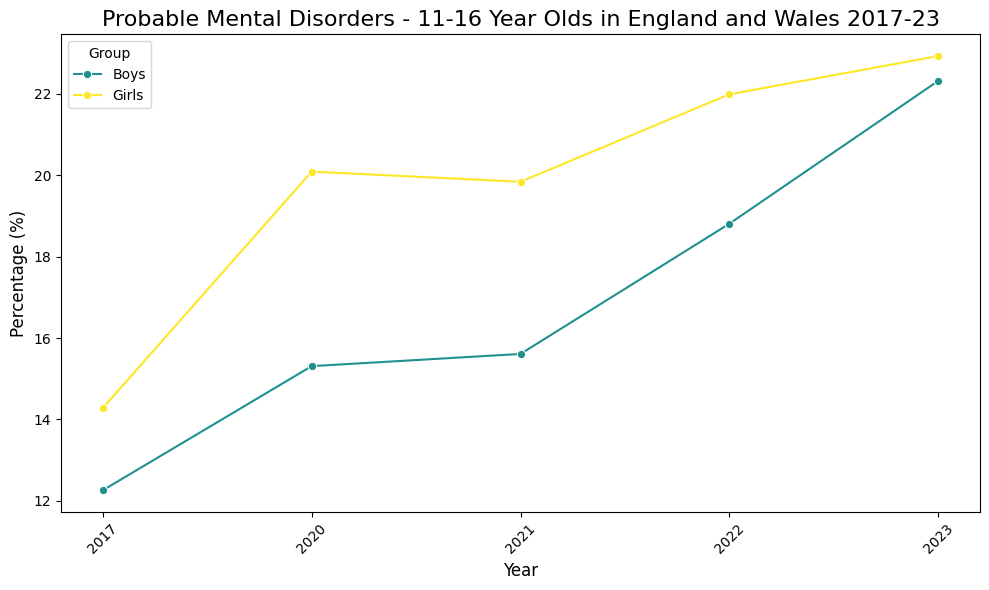

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Year': ['2017', '2020', '2021', '2022', '2023'],
    'Boys/Young Men': [12.26, 15.31, 15.61, 18.81, 22.32], 
    'Girls/Young Women': [14.28, 20.09, 19.84, 21.99, 22.93]  
}

# Create a DataFrame 
df_plot = pd.DataFrame(data)

# Plotting line graph
plt.figure(figsize=(10, 6))
custom_palette = ['#20908D',  # Teal
                  '#FDE725',  # Yellow
                 ]  
sns.lineplot(data=df_plot, x='Year', y='Boys/Young Men', label='Boys', marker='o', color='#20908D')
sns.lineplot(data=df_plot, x='Year', y='Girls/Young Women', label='Girls', marker='o', color='#FDE725')


# Customise
plt.title('Probable Mental Disorders - 11-16 Year Olds in England and Wales 2017-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
plt.show()

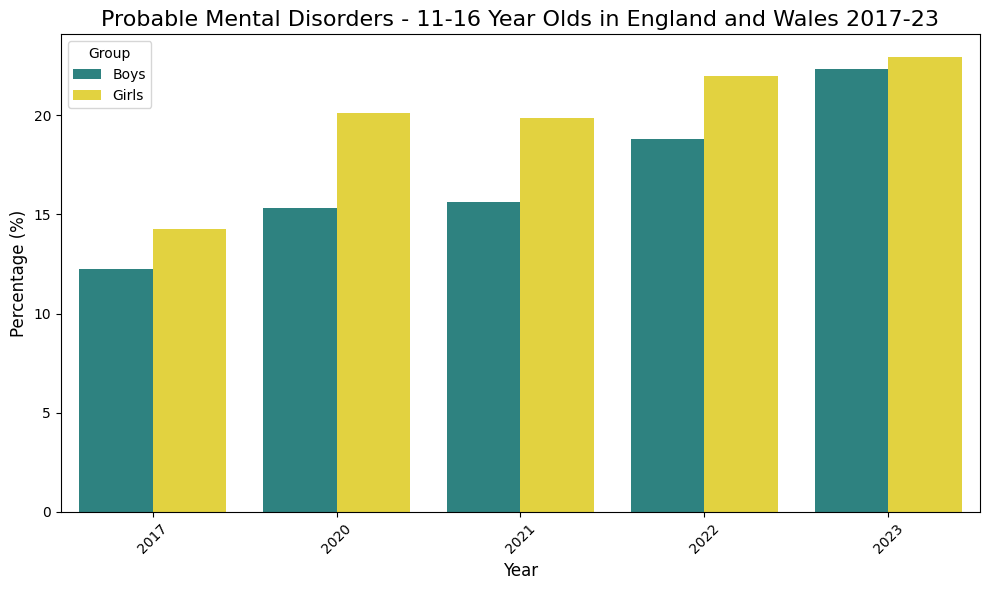

In [2]:
df_plot = pd.DataFrame(data)

# Reshape the data to long format (for easier plotting)
df_plot_long = df_plot.melt(id_vars='Year', var_name='Group', value_name='Percentage')

plt.figure(figsize=(10, 6))
custom_palette = ['#20908D',  # Teal
                  '#FDE725',  # Yellow
                 ]
sns.barplot(data=df_plot_long, x='Year', y='Percentage', hue='Group', palette=custom_palette, hue_order=['Boys/Young Men', 'Girls/Young Women'])

# Customise
plt.title('Probable Mental Disorders - 11-16 Year Olds in England and Wales 2017-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], labels=['Boys', 'Girls'], title='Group', loc='upper left')
plt.tight_layout()
plt.show()
